### **Preprocessing steps for 2-year and 4-year data.**

Since baseline data have already been preprocessed (Gagnon et al., 2025). This notebook will perform various preprocessing steps for the 2-year and 4-year data such as:

1. Hamonization across sites independently for all timepoints.
1. Residualization of covariates.
1. Factor analysis (EFA and CFA) on cognitive data.

In [3]:
# Imports
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS

from neurostatx.statistics.harmonization import neuroCombat
from neurostatx.io.utils import load_df_in_any_format

In [4]:
# Setting up relevant paths.
repository_path = "/Users/anthonygagnon/code/Gagnon_LongitudinalProfiles/" # CHANGE THIS
abcd_base_path = "/Volumes/T7/CCPM/ABCD/Release_5.1/abcd-data-release-5.1/" # CHANGE THIS
output_folder = "/Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles" # CHANGE THIS

# Setting up the paths for output subfolder.
output_dir = f"{output_folder}/datapreprocessing/" # DO NOT CHANGE THIS
os.makedirs(output_dir, exist_ok=True)

### **Harmonization across sites for the 2-year data.**

In [13]:
# Load 2-year data.
abcd_2y = load_df_in_any_format(f"{output_folder}/datagathering/abcd_data_2y.xlsx")

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_87788/3463740894.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks, rotation=45, ha="right")


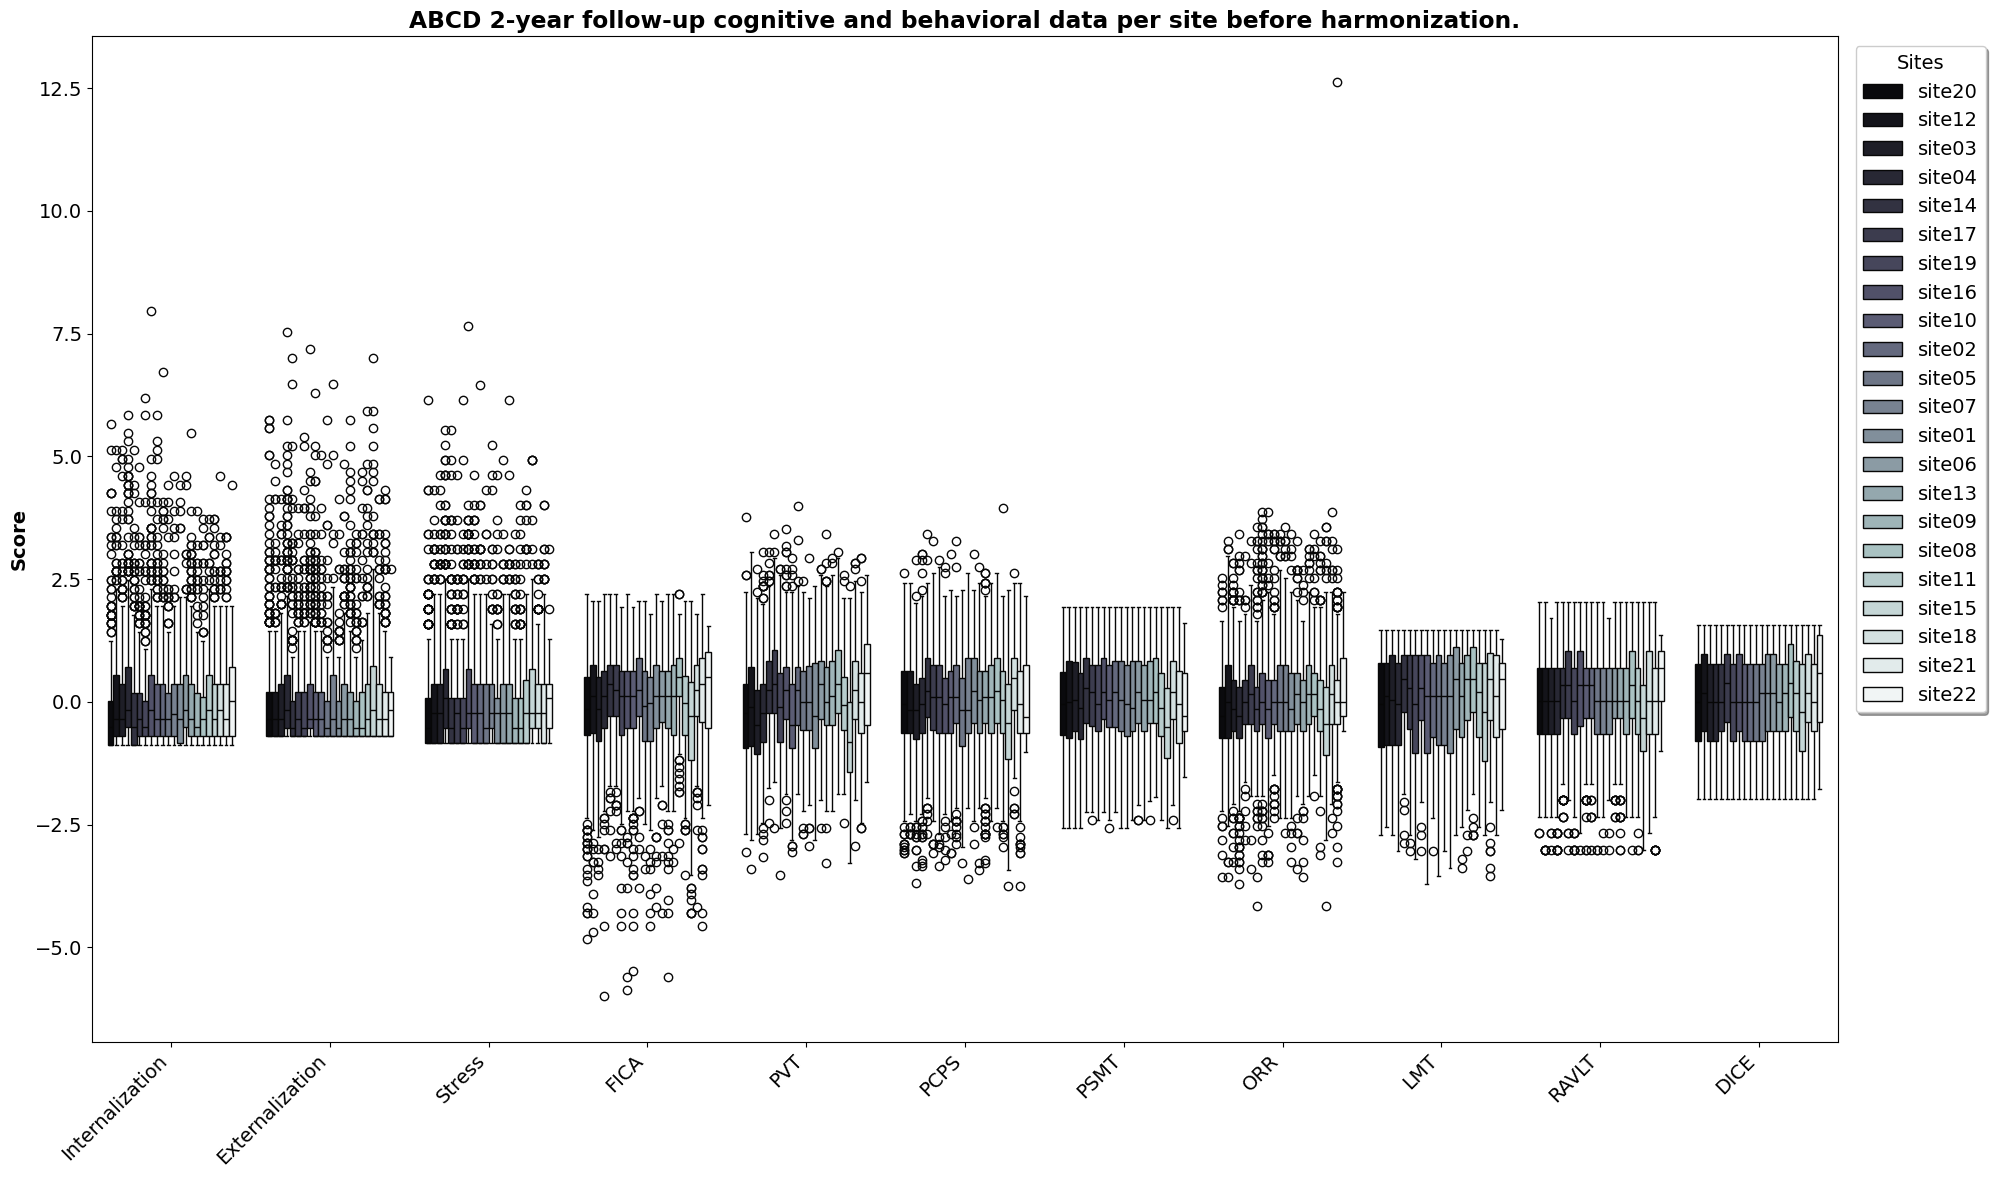

In [14]:
# Subset only site and cognitive/behavioral variables.
abcd_2y_viz = abcd_2y[[
    "Site", 'Internalizing', 'Externalizing', 'Stress',
    'Flanker', 'PictureVocab', 'PatternComparison', 'PictureSequence',
    'OralReading', 'LMT', 'RAVLT', 'DICE']]
abcd_2y_viz = abcd_2y_viz.melt(id_vars=["Site"])

# Setting xticks.
xticks = ["Internalization", "Externalization", "Stress", "FICA", "PVT",
          "PCPS", "PSMT", "ORR", "LMT", "RAVLT", "DICE"]

# Setting plotting parameters.
params = {
    "data": abcd_2y_viz,
    "x": "variable",
    "y": "value",
    "hue": "Site",
    "palette": "bone",
    "saturation": 0.8,
    "orient": "v",
}

with plt.rc_context(
    {"font.family": "Sans Serif", "font.size": 14,
     "font.weight": "normal", "axes.labelweight": "bold",}
):
    fig, ax = plt.subplots(1, 1, figsize=(20, 12))
    sns.boxplot(**params, ax=ax)

    ax.set_xticklabels(xticks, rotation=45, ha="right")
    ax.set_xlabel("")
    ax.set_ylabel("Score")
    ax.set_title("ABCD 2-year follow-up cognitive and behavioral data per site before harmonization.", fontdict={"weight": "bold"})
    ax.legend(loc="upper right", bbox_to_anchor=(1.09, 1.0), title="Sites", title_fontsize="medium",
              shadow=True, fancybox=True)
    plt.tight_layout()
    plt.show()

In [15]:
# Harmonization.
vars_to_harmonize = [
    'Internalizing', 'Externalizing', 'Stress',
    'Flanker', 'PictureVocab', 'PatternComparison', 'PictureSequence',
    'OralReading', 'LMT', 'RAVLT', 'DICE']

abcd_2y_for_harm = abcd_2y[vars_to_harmonize]
abcd_covars = abcd_2y[["Site"]]

# neuroCombat harmonization.
abcd_2y_harm = neuroCombat(
    abcd_2y_for_harm.values.T,
    abcd_covars,
    batch_col="Site",
    eb=True,
    parametric=True
)

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_87788/3019320718.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks, rotation=45, ha="right")


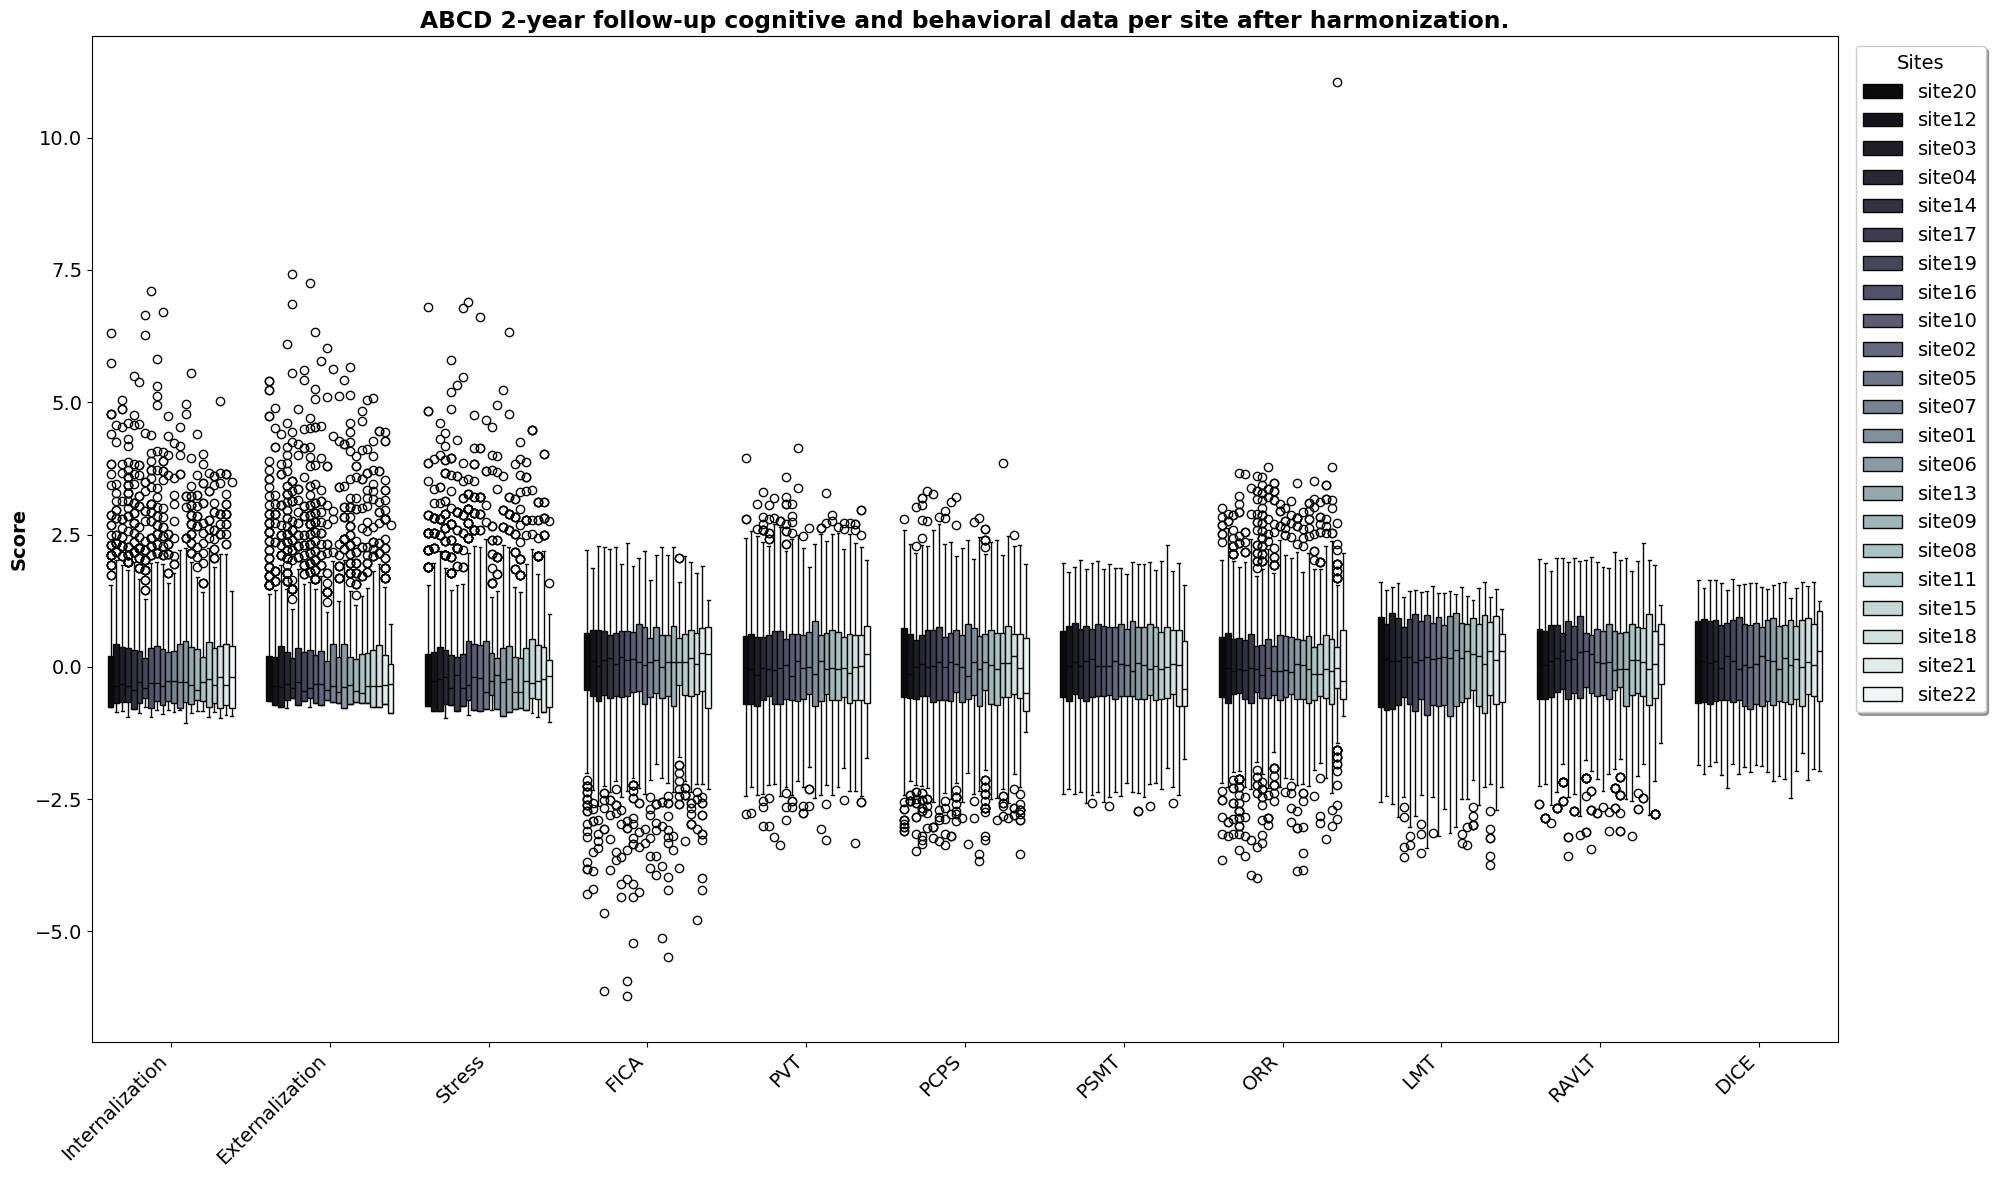

In [16]:
# Plotting harmonized data.
abcd_2y_postharm = pd.DataFrame(abcd_2y_harm['data'].T, columns=vars_to_harmonize)
abcd_2y_postharm = pd.concat([abcd_2y["Site"], abcd_2y_postharm], axis=1)

abcd_2y_postharm_viz = abcd_2y_postharm.melt(id_vars=["Site"])

# Setting plotting parameters.
params = {
    "data": abcd_2y_postharm_viz,
    "x": "variable",
    "y": "value",
    "hue": "Site",
    "palette": "bone",
    "saturation": 0.8,
    "orient": "v",
}

with plt.rc_context(
    {"font.family": "Sans Serif", "font.size": 14,
     "font.weight": "normal", "axes.labelweight": "bold",}
):
    fig, ax = plt.subplots(1, 1, figsize=(20, 12))
    sns.boxplot(**params, ax=ax)

    ax.set_xticklabels(xticks, rotation=45, ha="right")
    ax.set_xlabel("")
    ax.set_ylabel("Score")
    ax.set_title("ABCD 2-year follow-up cognitive and behavioral data per site after harmonization.", fontdict={"weight": "bold"})
    ax.legend(loc="upper right", bbox_to_anchor=(1.09, 1.0), title="Sites", title_fontsize="medium",
              shadow=True, fancybox=True)
    plt.tight_layout()
    plt.show()

In [23]:
# Merging back with the original data.
abcd_2y_harmonized = pd.concat([abcd_2y.drop(columns=vars_to_harmonize),
                                pd.DataFrame(abcd_2y_harm['data'].T)], axis=1)
abcd_2y_harmonized.columns = abcd_2y.columns

# Commented out since data is protected by a DUC.
# abcd_2y_harmonized.head()

### **Harmonization of the 4-year data.**

In [17]:
# Load the 4-year data.
abcd_4y = load_df_in_any_format(f"{output_folder}/datagathering/abcd_data_4y.xlsx")

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_87788/812286042.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks, rotation=45, ha="right")


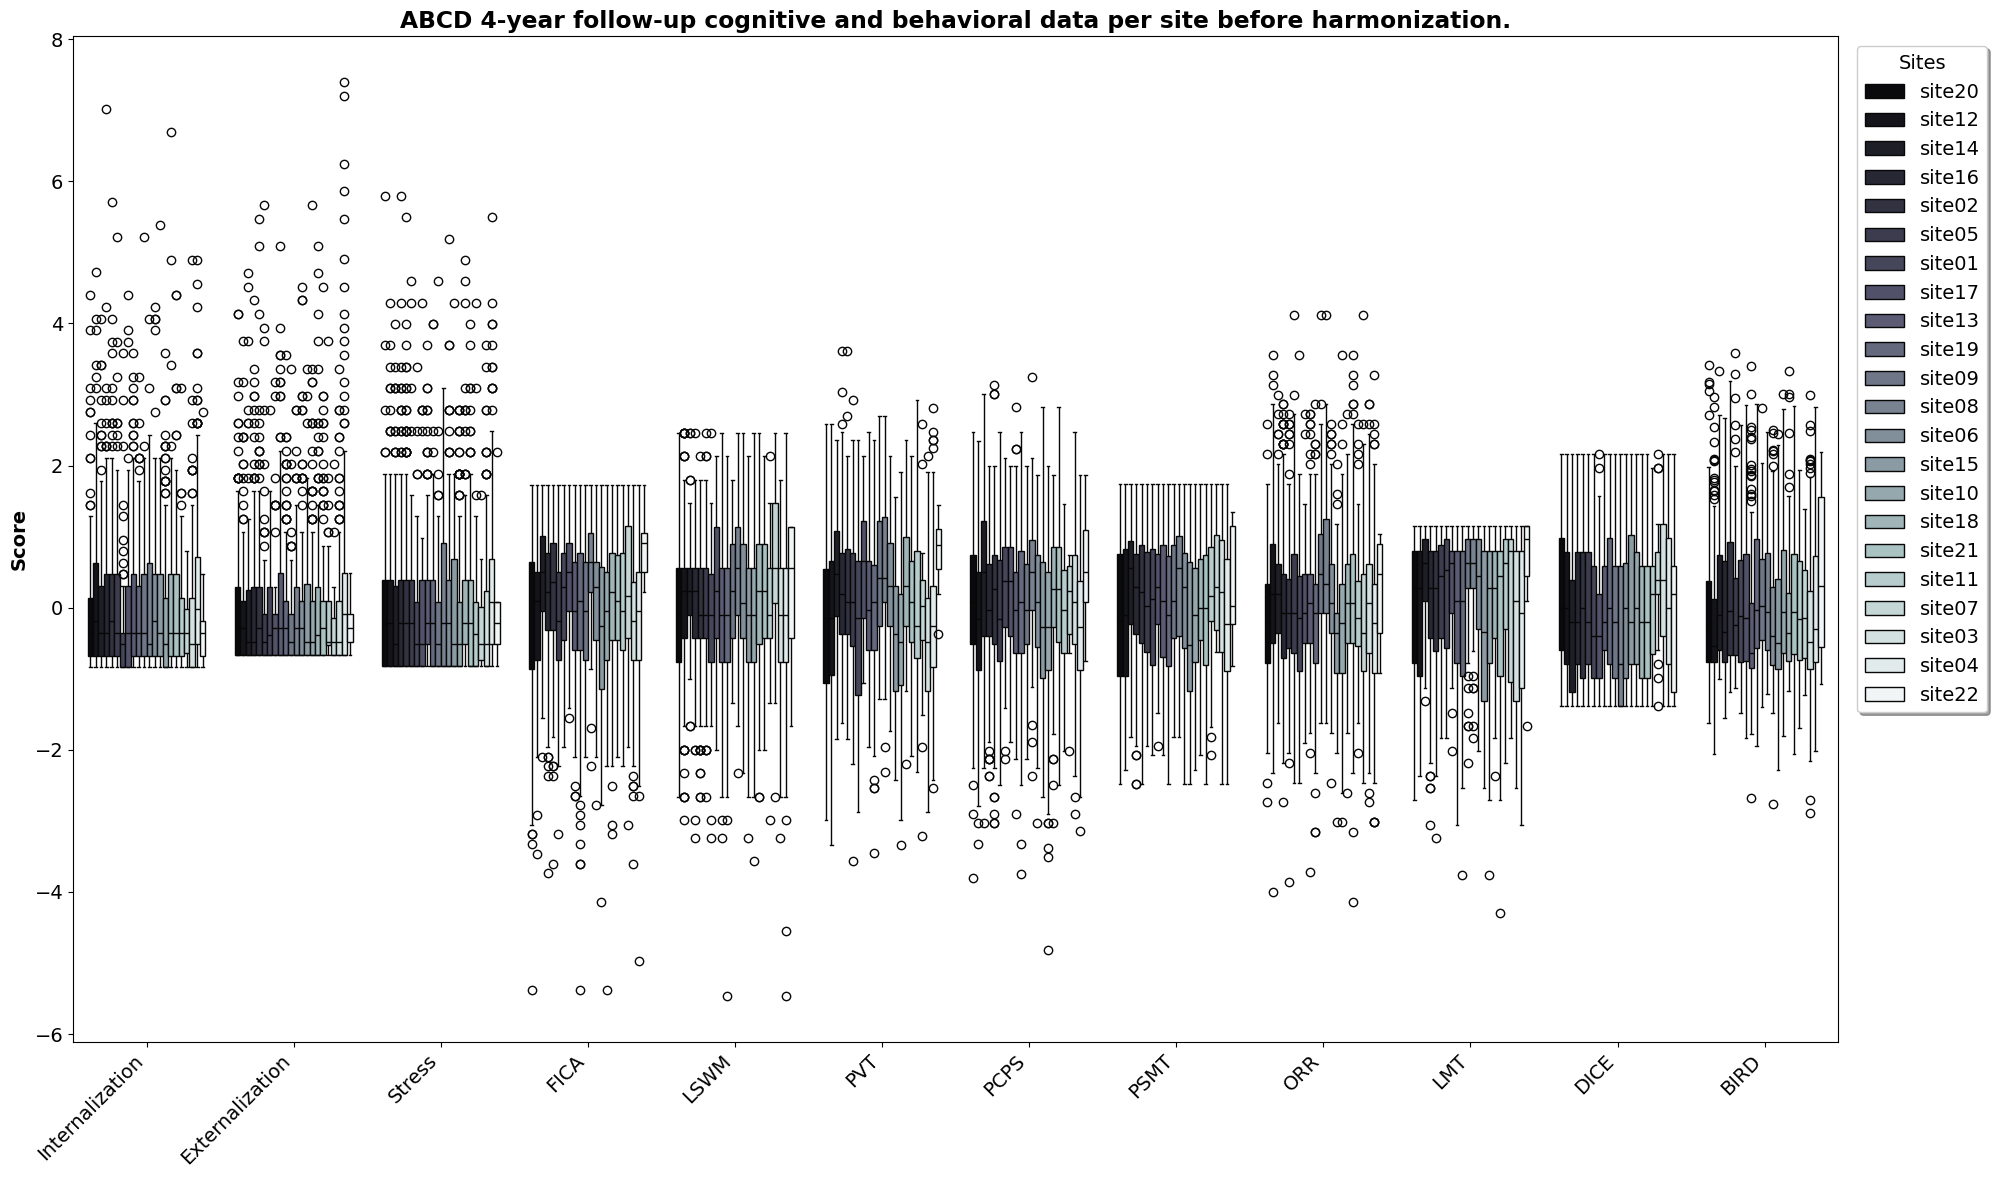

In [18]:
# Subset only site and cognitive/behavioral variables.
abcd_4y_viz = abcd_4y[[
    "Site", 'Internalizing', 'Externalizing', 'Stress',
    'Flanker', 'ListSorting', 'PictureVocab', 'PatternComparison',
    'PictureSequence', 'OralReading', 'LMT', 'DICE', 'BIRD']]
abcd_4y_viz = abcd_4y_viz.melt(id_vars=["Site"])

# Setting xticks.
xticks = ["Internalization", "Externalization", "Stress", "FICA", "LSWM", "PVT",
          "PCPS", "PSMT", "ORR", "LMT", "DICE", "BIRD"]

# Setting plotting parameters.
params = {
    "data": abcd_4y_viz,
    "x": "variable",
    "y": "value",
    "hue": "Site",
    "palette": "bone",
    "saturation": 0.8,
    "orient": "v",
}

with plt.rc_context(
    {"font.family": "Sans Serif", "font.size": 14,
     "font.weight": "normal", "axes.labelweight": "bold",}
):
    fig, ax = plt.subplots(1, 1, figsize=(20, 12))
    sns.boxplot(**params, ax=ax)

    ax.set_xticklabels(xticks, rotation=45, ha="right")
    ax.set_xlabel("")
    ax.set_ylabel("Score")
    ax.set_title("ABCD 4-year follow-up cognitive and behavioral data per site before harmonization.", fontdict={"weight": "bold"})
    ax.legend(loc="upper right", bbox_to_anchor=(1.09, 1.0), title="Sites", title_fontsize="medium",
              shadow=True, fancybox=True)
    plt.tight_layout()
    plt.show()

In [19]:
# Harmonization.
vars_to_harmonize = [
    'Internalizing', 'Externalizing', 'Stress',
    'Flanker', 'ListSorting', 'PictureVocab', 'PatternComparison',
    'PictureSequence', 'OralReading', 'LMT', 'DICE', 'BIRD']

abcd_4y_for_harm = abcd_4y[vars_to_harmonize]
abcd_covars = abcd_4y[["Site"]]

# neuroCombat harmonization.
abcd_4y_harm = neuroCombat(
    abcd_4y_for_harm.values.T,
    abcd_covars,
    batch_col="Site",
    eb=True,
    parametric=True
)

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_87788/2458838422.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks, rotation=45, ha="right")


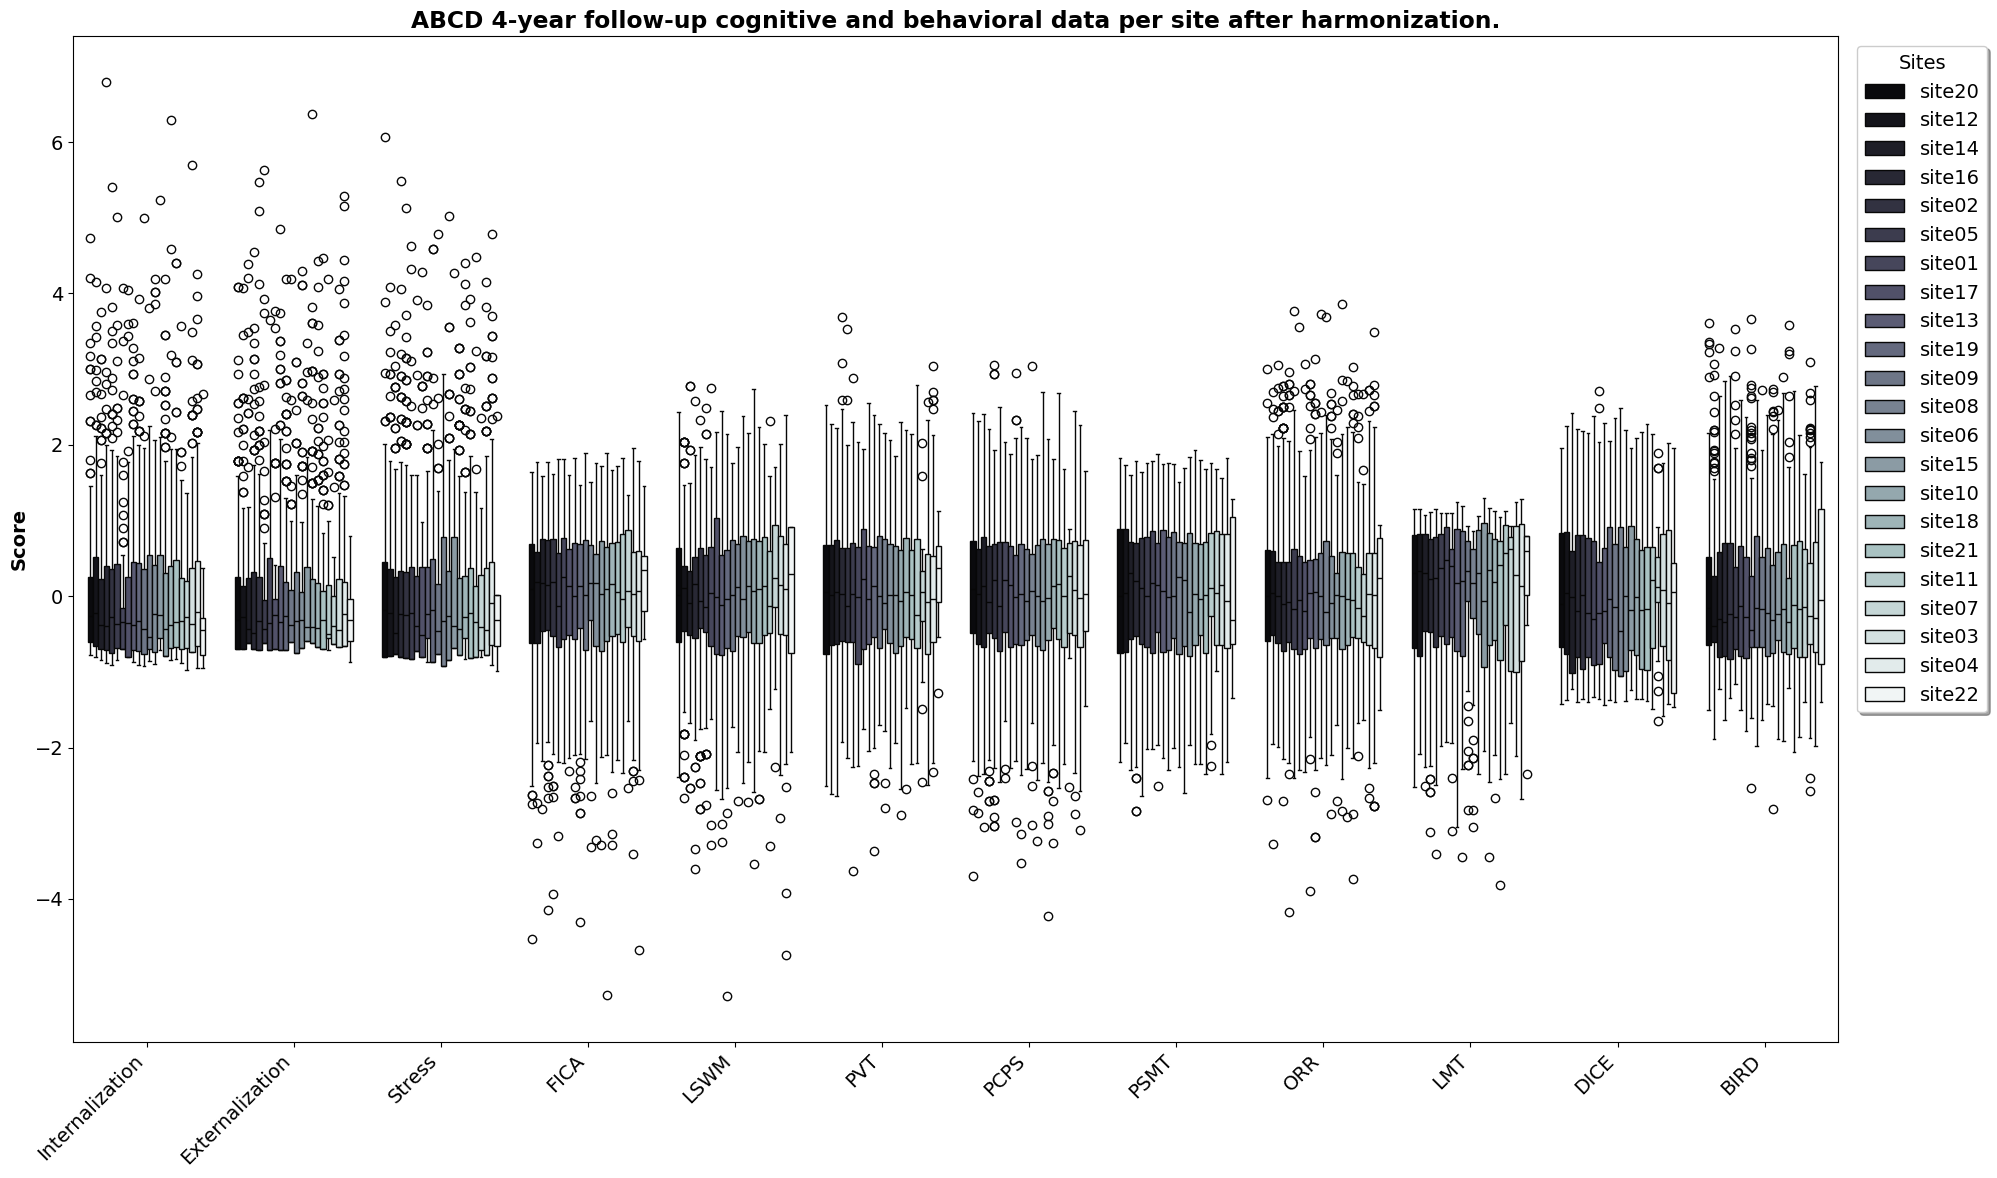

In [20]:
# Plotting harmonized data.
abcd_4y_postharm = pd.DataFrame(abcd_4y_harm['data'].T, columns=vars_to_harmonize)
abcd_4y_postharm = pd.concat([abcd_4y["Site"], abcd_4y_postharm], axis=1)

abcd_4y_postharm_viz = abcd_4y_postharm.melt(id_vars=["Site"])

# Setting plotting parameters.
params = {
    "data": abcd_4y_postharm_viz,
    "x": "variable",
    "y": "value",
    "hue": "Site",
    "palette": "bone",
    "saturation": 0.8,
    "orient": "v",
}

with plt.rc_context(
    {"font.family": "Sans Serif", "font.size": 14,
     "font.weight": "normal", "axes.labelweight": "bold",}
):
    fig, ax = plt.subplots(1, 1, figsize=(20, 12))
    sns.boxplot(**params, ax=ax)

    ax.set_xticklabels(xticks, rotation=45, ha="right")
    ax.set_xlabel("")
    ax.set_ylabel("Score")
    ax.set_title("ABCD 4-year follow-up cognitive and behavioral data per site after harmonization.", fontdict={"weight": "bold"})
    ax.legend(loc="upper right", bbox_to_anchor=(1.09, 1.0), title="Sites", title_fontsize="medium",
              shadow=True, fancybox=True)
    plt.tight_layout()
    plt.show()

In [28]:
# Merging back with the original data.
abcd_4y_harmonized = pd.concat([abcd_4y.drop(columns=vars_to_harmonize),
                                pd.DataFrame(abcd_4y_harm['data'].T)], axis=1)
abcd_4y_harmonized.columns = abcd_4y.columns

# Commented out since data is protected by a DUC.
# abcd_4y_harmonized.head()

### **Covariates residualization from cognitive and behavioral data.**

Following cells will regress out the following covariates from 2-year and 4-year data:

1. Sex
1. Age
1. Handedness
1. Ethinicity

In [8]:
# Keeping the harmonized data computed above for the 2-year data.
covars = ["Sex", "AgeMonths", "Ethnicity", "Handedness"]
vars = ['Internalizing', 'Externalizing', 'Stress', 'Flanker',
       'PictureVocab', 'PatternComparison', 'PictureSequence', 'OralReading',
       'LMT', 'RAVLT', 'DICE']

# Instantiating an empty df to store the residuals.
residuals = pd.DataFrame()

# Looping through the variables to compute residuals.
for var in vars:
    model = OLS(abcd_2y_harmonized[var].values, abcd_2y_harmonized[covars].values)
    results = model.fit()
    residuals[var] = results.resid

In [9]:
# Merging the residuals with the original data. 
abcd_2y_residualized = pd.concat([abcd_2y_harmonized.drop(columns=vars),
                                  residuals], axis=1)

# Saving the residualized data.
abcd_2y_residualized.to_excel(f"{output_dir}/abcd_2y_residualized.xlsx", index=False, header=True)

In [18]:
# Keeping the harmonized data computed above for the 4-year data.
covars = ["Sex", "AgeMonths", "Ethnicity", "Handedness"]
vars = ['Internalizing', 'Externalizing', 'Stress', 'Flanker',
       'ListSorting', 'PictureVocab', 'PatternComparison', 'PictureSequence',
       'OralReading', 'LMT', 'DICE', 'BIRD']

# Instantiating an empty df to store the residuals.
residuals = pd.DataFrame()

# Looping through the variables to compute residuals.
for var in vars:
    model = OLS(abcd_4y_harmonized[var].values, abcd_4y_harmonized[covars].values)
    results = model.fit()
    residuals[var] = results.resid

In [19]:
# Merge the residuals with the original data.
abcd_4y_residualized = pd.concat([abcd_4y_harmonized.drop(columns=vars),
                                  residuals], axis=1)

# Save the residualized data.
abcd_4y_residualized.to_excel(f"{output_dir}/abcd_4y_residualized.xlsx", index=False, header=True)

### **Computing the cognitive factor for the 2-year and 4-year datasets.**

Following [1] and [2], we can extract a factor structure from cognitive data to create interpretable cognitive factors. The following sections will perform a combined exploratory (EFA) and confirmatory factorial analysis (CFA).

[1] Moore, Dawn Michele, and Andrew R. A. Conway. “The Structure of Cognitive Abilities and Associations with Problem Behaviors in Early Adolescence: An Analysis of Baseline Data from the Adolescent Brain Cognitive Development Study.” Journal of Intelligence 11, no. 5 (May 10, 2023): 90. https://doi.org/10.3390/jintelligence11050090.

[2] TO ADD

**The next section is run using CLI python scripts within the [NeuroStatX](https://github.com/gagnonanthony/NeuroStatX.git) toolbox. Simply executing the cells below will run the underlying CLI script, but it might be less efficient. For a more optimized execution, run the CLI directly in your terminal window.**

In [13]:
# Using the residualized 2-y data for further analysis (saved on disk) and running the CLI script from the command line.
!ExploratoryFA --in-dataset {output_dir}/abcd_2y_residualized.xlsx --out-folder {output_dir}/ABCD_2y_EFA/ \
    --id-column subjectkey --desc-columns 25 --rotation oblimin --method minres --train_dataset_size 0.5 \
    -v -s -f --random_state 1234 --nb_factors 3

2024-11-07 16:21:14 Anthonys-MacBook-Pro.local root[83057] INFO Validating input files and creating output folder /Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//ABCD_2y_EFA/
2024-11-07 16:21:14 Anthonys-MacBook-Pro.local root[83057] INFO Loading ['/Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//abcd_2y_residualized.xlsx']
2024-11-07 16:21:15 Anthonys-MacBook-Pro.local root[83057] INFO Splitting into train and test datasets. Using training dataset for EFA.
2024-11-07 16:21:17 Anthonys-MacBook-Pro.local root[83057] INFO Bartlett's test of sphericity returned a p-value of 0.0 and Keiser-Meyer-Olkin (KMO)test returned a value of 0.7491262378430137.


In [14]:
!ConfirmatoryFA --in-dataset {output_dir}/ABCD_2y_EFA/test_dataset.xlsx --out-folder {output_dir}/ABCD_2y_CFA/ \
    --id-column subjectkey --desc-columns 25 \
    --model "VA =~ OralReading + PictureVocab" \
    --model "EFPS =~ PatternComparison + Flanker" \
    --model "MEM =~ PictureSequence + RAVLT" \
    -v -s -f --iterations 1000

2024-11-07 16:21:26 Anthonys-MacBook-Pro.local root[83398] INFO Validating input files and creating output folder /Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//ABCD_2y_CFA/
[Errno 2] No such file or directory: '._1'
2024-11-07 16:21:26 Anthonys-MacBook-Pro.local root[83398] INFO Loading ['/Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//ABCD_2y_EFA/test_dataset.xlsx']
2024-11-07 16:21:27 Anthonys-MacBook-Pro.local root[83398] INFO Performing Confirmatory Factorial Analysis (CFA) with the following model specification:
VA =~ OralReading + PictureVocab
EFPS =~ PatternComparison + Flanker
MEM =~ PictureSequence + RAVLT

2024-11-07 16:21:27 Anthonys-MacBook-Pro.local root[83398] INFO Exporting results and statistics.
2024-11-07 16:21:28 Anthonys-MacBook-Pro.local root[83398] INFO Bootstrapping the model.


In [22]:
!ApplyModel --in-dataset {output_dir}/abcd_2y_residualized.xlsx --out-folder {output_dir}/ABCD_2y_Apply/ \
    --id-column subjectkey --desc-columns 25 --model {output_dir}/ABCD_2y_CFA/cfa_model.pkl -v -s -f

2024-11-07 09:07:10 MacBookPro.med.usherbrooke.ca root[17779] INFO Validating input files and creating output folder /Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//ABCD_2y_Apply/
2024-11-07 09:07:10 MacBookPro.med.usherbrooke.ca root[17779] INFO Loading ['/Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//abcd_2y_residualized.xlsx']
2024-11-07 09:07:11 MacBookPro.med.usherbrooke.ca root[17779] INFO Loading model
2024-11-07 09:07:12 MacBookPro.med.usherbrooke.ca root[17779] INFO Applying model
2024-11-07 09:07:12 MacBookPro.med.usherbrooke.ca root[17779] INFO Saving transformed dataset


In [23]:
# Using the residualized 4-y data for further analysis (saved on disk) and running the CLI script from the command line.
!ExploratoryFA --in-dataset {output_dir}/abcd_4y_residualized.xlsx --out-folder {output_dir}/ABCD_4y_EFA/ \
    --id-column subjectkey --desc-columns 16 --rotation oblimin --method minres --train_dataset_size 0.5 \
    -v -s -f --random_state 1234 --nb_factors 3

2024-11-07 09:07:16 MacBookPro.med.usherbrooke.ca root[17886] INFO Validating input files and creating output folder /Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//ABCD_4y_EFA/
2024-11-07 09:07:16 MacBookPro.med.usherbrooke.ca root[17886] INFO Loading ['/Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//abcd_4y_residualized.xlsx']
2024-11-07 09:07:16 MacBookPro.med.usherbrooke.ca root[17886] INFO Splitting into train and test datasets. Using training dataset for EFA.
2024-11-07 09:07:17 MacBookPro.med.usherbrooke.ca root[17886] INFO Bartlett's test of sphericity returned a p-value of 0.0 and Keiser-Meyer-Olkin (KMO)test returned a value of 0.7752516972247523.


In [24]:
!ConfirmatoryFA --in-dataset {output_dir}/ABCD_4y_EFA/test_dataset.xlsx --out-folder {output_dir}/ABCD_4y_CFA/ \
    --id-column subjectkey --desc-columns 16 \
    --model "VA =~ OralReading + PictureVocab" \
    --model "EFPS =~ PatternComparison + Flanker" \
    --model "MEM =~ PictureSequence + ListSorting" \
    -v -s -f --iterations 1000

2024-11-07 09:07:22 MacBookPro.med.usherbrooke.ca root[18008] INFO Validating input files and creating output folder /Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//ABCD_4y_CFA/
2024-11-07 09:07:22 MacBookPro.med.usherbrooke.ca root[18008] INFO Loading ['/Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//ABCD_4y_EFA/test_dataset.xlsx']
2024-11-07 09:07:22 MacBookPro.med.usherbrooke.ca root[18008] INFO Performing Confirmatory Factorial Analysis (CFA) with the following model specification:
VA =~ OralReading + PictureVocab
EFPS =~ PatternComparison + Flanker
MEM =~ PictureSequence + ListSorting

2024-11-07 09:07:22 MacBookPro.med.usherbrooke.ca root[18008] INFO Exporting results and statistics.
2024-11-07 09:07:23 MacBookPro.med.usherbrooke.ca root[18008] INFO Bootstrapping the model.


In [25]:
!ApplyModel --in-dataset {output_dir}/abcd_4y_residualized.xlsx --out-folder {output_dir}/ABCD_4y_Apply/ \
    --id-column subjectkey --desc-columns 16 --model {output_dir}/ABCD_4y_CFA/cfa_model.pkl -v -s -f

2024-11-07 09:07:29 MacBookPro.med.usherbrooke.ca root[18154] INFO Validating input files and creating output folder /Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//ABCD_4y_Apply/
2024-11-07 09:07:29 MacBookPro.med.usherbrooke.ca root[18154] INFO Loading ['/Volumes/T7/CCPM/RESULTS_JUNE_24/LongitudinalProfiles/datapreprocessing//abcd_4y_residualized.xlsx']
2024-11-07 09:07:29 MacBookPro.med.usherbrooke.ca root[18154] INFO Loading model
2024-11-07 09:07:29 MacBookPro.med.usherbrooke.ca root[18154] INFO Applying model
2024-11-07 09:07:29 MacBookPro.med.usherbrooke.ca root[18154] INFO Saving transformed dataset


#### **Utility cells to copy transformed datasets in the root of the `output_dir`**

In [26]:
# Copying the results to the output directory
!cp "{output_dir}/ABCD_2y_Apply/transformed_dataset.xlsx" "{output_dir}/abcd_2y_preprocessed.xlsx"
!cp "{output_dir}/ABCD_4y_Apply/transformed_dataset.xlsx" "{output_dir}/abcd_4y_preprocessed.xlsx"